We are using autocorrect every day on your cell phone and computer. In this project, I will discuss what really goes on behind the scenes.
> > 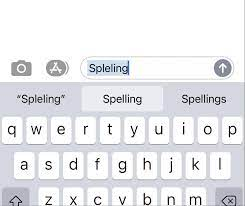





# Edit Distance algorithm
- Implemention of model in which correct words that are 1 and 2 edit distances away
- An edit could consist of one of the following options:

1. Delete (remove a letter): ‘hat’ => ‘at, ha, ht’
2. Switch (swap 2 adjacent letters): ‘eta’ => ‘eat, tea,...’
3. Replace (change 1 letter to another): ‘jat’ => ‘hat, rat, cat, mat, ...’
4. Insert (add a letter): ‘te’ => ‘the, ten, ate, ...’

# Data Preprocessing

In [ ]:
import re
from collections import Counter
import numpy as np
import pandas as pd

In [ ]:
def process_data(file_name):
  
    words = [] # return this variable correctly

    
    with open(file_name) as f:
        text = f.read()
    text_lowercase = text.lower()
    words = re.findall(r'\w+', text_lowercase)
 
    return words

In [ ]:
word_l = process_data('/content/drive/MyDrive/Colab Notebooks/natural language processing/Autocorrection/shakespeare.txt')
vocab = set(word_l)  # this will be your new vocabulary
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire', 'that', 'would', 'ascend', 'the']
There are 6116 unique words in the vocabulary.


#Counting each word is the number of times that word appears in the corpus

In [ ]:
def get_count(word_l):

    word_count_dict = {}  # fill this with word counts
    
    for word in word_l:
        word_count_dict[word] = word_count_dict.get(word,0)+1
  
    return word_count_dict

In [ ]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 6116 key values pairs
The count for the word 'thee' is 240


# Probability that a word occurs in a sample

In [ ]:
def get_probs(word_count_dict):
    
    probs = {}  # return this variable correctly

    count =0
    for i in word_count_dict.values():
        count= count+i
    for word in word_count_dict.keys():
        p = word_count_dict[word]/count
        probs[word] = p

    return probs

In [ ]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('thee') is {probs['thee']:.4f}")

Length of probs is 6116
P('thee') is 0.0045


# String Manipulations

- delete_letter: given a word, it returns all the possible strings that have one character removed.
- switch_letter: given a word, it returns all the possible strings that have two adjacent letters switched.
- replace_letter: given a word, it returns all the possible strings that have one character replaced by another different letter.
- insert_letter: given a word, it returns all the possible strings that have an additional character inserted.

In [ ]:
def delete_letter(word, verbose=False):
   
    
    delete_l = []
    split_l = []

    for c in range(len(word)):
        split_l.append((word[:c],word[c:]))
    for a,b in split_l:
        delete_l.append(a+b[1:])   
 

    if verbose: print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return delete_l

In [ ]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [ ]:
print(f"Number of outputs of delete_letter('at') is {len(delete_letter('at'))}")

Number of outputs of delete_letter('at') is 2


In [ ]:
def switch_letter(word, verbose=False):
    
    switch_l = []
    split_l = []
    
    
    def swap(c, i, j):
        c = list(c)
        c[i], c[j] = c[j], c[i]
        return ''.join(c)
    
    switch_l = []
    split_l = []
    len_word=len(word)
    
    for c in range(len_word):
        split_l.append((word[:c],word[c:]))
    switch_l = [a + b[1] + b[0] + b[2:] for a,b in split_l if len(b) >= 2]  
    
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 

    return switch_l

In [ ]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [ ]:
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('at'))}")

Number of outputs of switch_letter('at') is 1


In [ ]:
def replace_letter(word, verbose=False):
   
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    
    
    for c in range(len(word)):
        split_l.append((word[0:c],word[c:]))
    replace_l = [a + l + (b[1:] if len(b)> 1 else '') for a,b in split_l if b for l in letters]
    replace_set=set(replace_l)    
    replace_set.remove(word)
    
    
    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    
    return replace_l

In [ ]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [ ]:
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('at'))}")

Number of outputs of switch_letter('at') is 1


In [ ]:
def insert_letter(word, verbose=False):
 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    
  
    for c in range(len(word)+1):
        split_l.append((word[0:c],word[c:]))
    insert_l = [ a + l + b for a,b in split_l for l in letters]
   

    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [ ]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


In [ ]:
print(f"Number of outputs of insert_letter('at') is {len(insert_letter('at'))}")

Number of outputs of insert_letter('at') is 78


#Combining the edits

- edit_one_letter function: get all the possible edits that are one edit away from a word

- edit_two_letters function: returns a set of words that are two edits away

- get_corrections: returns a list of zero to n possible suggestion tuples of the form (word, probability_of_word)

In [ ]:
def edit_one_letter(word, allow_switches = True):

    edit_one_set = set()

    edit_one_set.update(delete_letter(word))
    if allow_switches:
        edit_one_set.update(switch_letter(word))
    edit_one_set.update(replace_letter(word))
    edit_one_set.update(insert_letter(word))
  

    return edit_one_set

In [ ]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <class 'set'>
Number of outputs from edit_one_letter('at') is 129


In [ ]:
def edit_two_letters(word, allow_switches = True):
  
    edit_two_set = set()
   
    edit_one = edit_one_letter(word,allow_switches=allow_switches)
    for w in edit_one:
        if w:
            edit_two = edit_one_letter(w,allow_switches=allow_switches)
            edit_two_set.update(edit_two)
    
    return edit_two_set

In [ ]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


In [33]:
def get_corrections(word, probs, vocab, n=2, verbose = False):
    
    suggestions = []
    n_best = []

    suggestions = list((word in vocab and word) or edit_one_letter(word).intersection(vocab) or edit_two_letters(word).intersection(vocab))
    n_best = [[s,probs[s]] for s in list(reversed(suggestions))]

    if verbose: print("Entered word = ", word, "and Suggestions = ", suggestions)

    return n_best

In [34]:
my_word = 'dys' 
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True) # keep verbose=True
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

print(f"data type of corrections {type(tmp_corrections)}")

Entered word =  dys and Suggestions =  ['dye', 'days']
word 0: days, probability 0.000410
word 1: dye, probability 0.000019
data type of corrections <class 'list'>


# Minimum Edit distance

- Evaluate the similarity between two strings- For example: 'waht' and 'what'
- Efficiently find the shortest path to go from the word, 'waht' to the word 'what'

In [ ]:
def min_edit_distance(source, target, ins_cost = 1, del_cost = 1, rep_cost = 2):

    # use deletion and insert cost as  1
    m = len(source) 
    n = len(target) 
    #initialize cost matrix with zeros and dimensions (m+1,n+1) 
    D = np.zeros((m+1, n+1), dtype=int) 
    
    # Fill in column 0, from row 1 to row m, both inclusive
    for row in range(1,m+1): # Replace None with the proper range
        D[row,0] = D[row-1,0] + del_cost
        
    # Fill in row 0, for all columns from 1 to n, both inclusive
    for col in range(1,n+1): # Replace None with the proper range
        D[0,col] = D[0,col-1] + ins_cost
        
    # Loop through row 1 to row m, both inclusive
    for row in range(1,m+1): 
        
        # Loop through column 1 to column n, both inclusive
        for col in range(1,n+1):
            
            # Intialize r_cost to the 'replace' cost that is passed into this function
            r_cost = rep_cost
            
            # Check to see if source character at the previous row
            # matches the target character at the previous column, 
            if source[row-1] == target[col-1]:
                # Update the replacement cost to 0 if source and target are the same
                r_cost = 0
                
            # Update the cost at row, col based on previous entries in the cost matrix
            D[row,col] = min([D[row-1,col]+del_cost, D[row,col-1]+ins_cost, D[row-1,col-1]+r_cost])
          
    # Set the minimum edit distance with the cost found at row m, column n
    med = D[m,n]
    
    return D, med

In [ ]:
source =  'play'
target = 'stay'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list('#' + source)
cols = list('#' + target)
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  4 

   #  s  t  a  y
#  0  1  2  3  4
p  1  2  3  4  5
l  2  3  4  5  6
a  3  4  5  4  5
y  4  5  6  5  4


In [ ]:
source =  'eer'
target = 'near'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list(source)
idx.insert(0, '#')
cols = list(target)
cols.insert(0, '#')
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  3 

   #  n  e  a  r
#  0  1  2  3  4
e  1  2  1  2  3
e  2  3  2  3  4
r  3  4  3  4  3
